In [ ]:
import chess
import chess.engine
import chess.svg
from IPython.display import SVG, display
import time
from engine import MyEngine

import data.download

%load_ext autoreload
%autoreload 2

We will now download move tables to ensure optimal play during the opening and the endamge (up to 5 remaining pieces)

Make sure you are OK with the data before downloading/using it as these files are downloaded from 3rd partys and I don't claim responsibility for the integrity of them

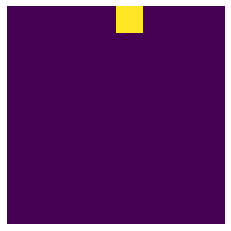

In [22]:
import data.dataset
import numpy as np
import matplotlib.pyplot as plt

tensor = data.dataset.encode_board(chess.Board())
for i in range(12):
    plt.imshow(tensor[i])
    plt.axis('off')
    plt.savefig(f"./{i}.svg")




In [ ]:
data.download.download_syzygy_from_url()
data.download.dowload_polyglot_from_url()
data.download.download_stockfish_from_url()

We will create 2 engines one for each player (one is our engine the other is the current version of the stock fish engine)

In [ ]:
engine = chess.engine.SimpleEngine.popen_uci("./data/stockfish/stockfish_15_linux_x64_ssse/stockfish_15_x64_ssse")
myengine = MyEngine()

In [ ]:
board = chess.Board()

while not board.is_game_over():
    display(SVG(chess.svg.board(board, size = 400)), clear=False)
    
    print(engine.play(board, chess.engine.Limit(time=0.1)))

    move = myengine.play(board, 2)

    board.push(move)

display(SVG(chess.svg.board(board, size = 400)), clear=False)

engine.quit()